In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=28d927de0f234d729c3b8056e762df672a879a544be3761589b5682caa6beb70
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("BDA-Mini-project").getOrCreate()

In [3]:
import pandas as pd
from pyspark.sql import functions as F

In [4]:
from pyspark.ml import Pipeline
from pyspark.sql.types import IntegerType

Train dataset


In [5]:
data = spark.read.csv('/content/train_data.csv',header=True,inferSchema=True)
data.show(5)

+-------+---------+--------------------+-------------------+---------+------+----------+------------+-------+----------------+--------------+--------+-------------------+-------------------+-------+-----------+-------+--------------------+-----------+-----------+------------+--------+-----------------+---------------------+-----+----------+-----------+--------------+--------+-----------+-----------+--------+--------------+----------+------+----------------+--------------------+---------+------------+--------------+---------+----------+------------+-----------------+-------------------+----------------+-------------------+-------------------+-------+----------------------------+------+-----------------+---------------+--------------+----------+----------+----------+-----------------+---------------+---------------------------+-------------------+------------+------------------+---------+---------+------+--------+-------+------------+---------------------+-------------------+------------

In [6]:
df=data.select("prognosis").distinct()
df.show()

+--------------------+
|           prognosis|
+--------------------+
|            Impetigo|
|Urinary tract inf...|
|     Hyperthyroidism|
|     Gastroenteritis|
|        Heart attack|
| Chronic cholestasis|
|        Tuberculosis|
|        Hypoglycemia|
|Cervical spondylosis|
|         Hepatitis D|
|     Osteoarthristis|
|      Varicose veins|
|            Migraine|
|         Hepatitis B|
|           Arthritis|
|             Malaria|
|      Hypothyroidism|
|         Chicken pox|
|       Hypertension |
| Peptic ulcer diseae|
+--------------------+
only showing top 20 rows



Test dataset


In [8]:
data2 =spark.read.csv("/content/test_data.csv",header=True,inferSchema=True)
data2.show(5)

+-------+---------+--------------------+-------------------+---------+------+----------+------------+-------+----------------+--------------+--------+-------------------+-------------------+-------+-----------+-------+--------------------+-----------+-----------+------------+--------+-----------------+---------------------+-----+----------+-----------+--------------+--------+-----------+-----------+--------+--------------+----------+------+----------------+--------------------+---------+------------+--------------+---------+----------+------------+-----------------+-------------------+----------------+-------------------+-------------------+-------+----------------------------+------+-----------------+---------------+--------------+----------+----------+----------+-----------------+---------------+---------------------------+-------------------+------------+------------------+---------+---------+------+--------+-------+------------+---------------------+-------------------+------------

In [9]:
df2 = data2.select("prognosis").distinct()
df2.show()

+--------------------+
|           prognosis|
+--------------------+
|            Impetigo|
|Urinary tract inf...|
|     Hyperthyroidism|
|     Gastroenteritis|
|        Heart attack|
| Chronic cholestasis|
|        Tuberculosis|
|        Hypoglycemia|
|Cervical spondylosis|
|         Hepatitis D|
|     Osteoarthristis|
|      Varicose veins|
|            Migraine|
|         Hepatitis B|
|           Arthritis|
|             Malaria|
|      Hypothyroidism|
|         Chicken pox|
|       Hypertension |
| Peptic ulcer diseae|
+--------------------+
only showing top 20 rows



In [10]:
print(data.dtypes)
print(data.count())

[('itching', 'int'), ('skin_rash', 'int'), ('nodal_skin_eruptions', 'int'), ('continuous_sneezing', 'int'), ('shivering', 'int'), ('chills', 'int'), ('joint_pain', 'int'), ('stomach_pain', 'int'), ('acidity', 'int'), ('ulcers_on_tongue', 'int'), ('muscle_wasting', 'int'), ('vomiting', 'int'), ('burning_micturition', 'int'), ('spotting_ urination', 'int'), ('fatigue', 'int'), ('weight_gain', 'int'), ('anxiety', 'int'), ('cold_hands_and_feets', 'int'), ('mood_swings', 'int'), ('weight_loss', 'int'), ('restlessness', 'int'), ('lethargy', 'int'), ('patches_in_throat', 'int'), ('irregular_sugar_level', 'int'), ('cough', 'int'), ('high_fever', 'int'), ('sunken_eyes', 'int'), ('breathlessness', 'int'), ('sweating', 'int'), ('dehydration', 'int'), ('indigestion', 'int'), ('headache', 'int'), ('yellowish_skin', 'int'), ('dark_urine', 'int'), ('nausea', 'int'), ('loss_of_appetite', 'int'), ('pain_behind_the_eyes', 'int'), ('back_pain', 'int'), ('constipation', 'int'), ('abdominal_pain', 'int'), 

In [11]:
print("no.of columns = ",len(data.columns))
print("no.of rows = ",data.count())

no.of columns =  133
no.of rows =  4920


In [12]:
print("The training dataset contains {} samples.".format(data.count()))
print("The test dataset contains {} samples.".format(data2.count()))

The training dataset contains 4920 samples.
The test dataset contains 42 samples.


In [13]:
data.select("*").toPandas().head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [14]:
numeric_features = [t[0] for t in data.dtypes if t[1] == 'int' or t[1] == 'double']
data.describe(numeric_features).toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
itching,4920,0.1378048780487805,0.34473010874032145,0,1
skin_rash,4920,0.1597560975609756,0.36641694249935314,0,1
nodal_skin_eruptions,4920,0.02195121951219512,0.14653916900608888,0,1
continuous_sneezing,4920,0.045121951219512194,0.20759267768168482,0,1
...,...,...,...,...,...
small_dents_in_nails,4920,0.023170731707317073,0.15046079293451484,0,1
inflammatory_nails,4920,0.023170731707317073,0.15046079293451484,0,1
blister,4920,0.023170731707317073,0.15046079293451478,0,1
red_sore_around_nose,4920,0.023170731707317073,0.15046079293451478,0,1


In [15]:
sampled_data = data.select(numeric_features).sample(False, 0.10)
print("The sampled dataset contains {} samples.".format(sampled_data.count()))

The sampled dataset contains 498 samples.


In [16]:
print(data.dtypes)

[('itching', 'int'), ('skin_rash', 'int'), ('nodal_skin_eruptions', 'int'), ('continuous_sneezing', 'int'), ('shivering', 'int'), ('chills', 'int'), ('joint_pain', 'int'), ('stomach_pain', 'int'), ('acidity', 'int'), ('ulcers_on_tongue', 'int'), ('muscle_wasting', 'int'), ('vomiting', 'int'), ('burning_micturition', 'int'), ('spotting_ urination', 'int'), ('fatigue', 'int'), ('weight_gain', 'int'), ('anxiety', 'int'), ('cold_hands_and_feets', 'int'), ('mood_swings', 'int'), ('weight_loss', 'int'), ('restlessness', 'int'), ('lethargy', 'int'), ('patches_in_throat', 'int'), ('irregular_sugar_level', 'int'), ('cough', 'int'), ('high_fever', 'int'), ('sunken_eyes', 'int'), ('breathlessness', 'int'), ('sweating', 'int'), ('dehydration', 'int'), ('indigestion', 'int'), ('headache', 'int'), ('yellowish_skin', 'int'), ('dark_urine', 'int'), ('nausea', 'int'), ('loss_of_appetite', 'int'), ('pain_behind_the_eyes', 'int'), ('back_pain', 'int'), ('constipation', 'int'), ('abdominal_pain', 'int'), 

In [17]:
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
# Define your feature columns
feature_columns = [
    'throat_irritation', 'sinus_pressure', 'itching', 'skin_rash', 'nodal_skin_eruptions',
    'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain',
    'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting',
    'small_dents_in_nails', 'inflammatory_nails', 'blister',
    'red_sore_around_nose', 'yellow_crust_ooze', 'spotting_ urination'
]
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("MyApp").getOrCreate()
data = spark.read.csv("/content/train_data.csv", header=True, inferSchema=True)
label_indexer = StringIndexer(inputCol="prognosis", outputCol="label")
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
classifier = RandomForestClassifier(labelCol='label', featuresCol='features')
stages = [label_indexer, assembler, classifier]
pipeline = Pipeline(stages=stages)
pipelineModel = pipeline.fit(data)
data = pipelineModel.transform(data)
selectedCols = ['label'] + feature_columns
data = data.select(selectedCols)
data.printSchema()

root
 |-- label: double (nullable = false)
 |-- throat_irritation: integer (nullable = true)
 |-- sinus_pressure: integer (nullable = true)
 |-- itching: integer (nullable = true)
 |-- skin_rash: integer (nullable = true)
 |-- nodal_skin_eruptions: integer (nullable = true)
 |-- continuous_sneezing: integer (nullable = true)
 |-- shivering: integer (nullable = true)
 |-- chills: integer (nullable = true)
 |-- joint_pain: integer (nullable = true)
 |-- stomach_pain: integer (nullable = true)
 |-- acidity: integer (nullable = true)
 |-- ulcers_on_tongue: integer (nullable = true)
 |-- muscle_wasting: integer (nullable = true)
 |-- vomiting: integer (nullable = true)
 |-- small_dents_in_nails: integer (nullable = true)
 |-- inflammatory_nails: integer (nullable = true)
 |-- blister: integer (nullable = true)
 |-- red_sore_around_nose: integer (nullable = true)
 |-- yellow_crust_ooze: integer (nullable = true)
 |-- spotting_ urination: integer (nullable = true)



In [18]:
train, test = data.randomSplit([0.7, 0.3], seed=2018)
train.groupby('label').count().show()
test.groupby('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|  8.0|   80|
|  0.0|   85|
|  7.0|   93|
| 29.0|   84|
| 35.0|   89|
| 18.0|   83|
|  1.0|   81|
| 39.0|   80|
| 34.0|   77|
| 37.0|   84|
| 25.0|   84|
| 36.0|   82|
|  4.0|   89|
| 23.0|   82|
| 31.0|   89|
| 11.0|   86|
| 21.0|   80|
| 14.0|   89|
| 22.0|   77|
|  3.0|   81|
+-----+-----+
only showing top 20 rows

+-----+-----+
|label|count|
+-----+-----+
|  8.0|   40|
|  0.0|   35|
|  7.0|   27|
| 29.0|   36|
| 35.0|   31|
| 18.0|   37|
|  1.0|   39|
| 39.0|   40|
| 34.0|   43|
| 37.0|   36|
| 25.0|   36|
| 36.0|   38|
|  4.0|   31|
| 23.0|   38|
| 31.0|   31|
| 11.0|   34|
| 21.0|   40|
| 14.0|   31|
| 22.0|   43|
|  3.0|   39|
+-----+-----+
only showing top 20 rows



In [19]:
data = spark.read.csv('/content/train_data.csv',header=True,inferSchema=True)
data.show(5)

+-------+---------+--------------------+-------------------+---------+------+----------+------------+-------+----------------+--------------+--------+-------------------+-------------------+-------+-----------+-------+--------------------+-----------+-----------+------------+--------+-----------------+---------------------+-----+----------+-----------+--------------+--------+-----------+-----------+--------+--------------+----------+------+----------------+--------------------+---------+------------+--------------+---------+----------+------------+-----------------+-------------------+----------------+-------------------+-------------------+-------+----------------------------+------+-----------------+---------------+--------------+----------+----------+----------+-----------------+---------------+---------------------------+-------------------+------------+------------------+---------+---------+------+--------+-------+------------+---------------------+-------------------+------------

In [20]:
df.show()


+--------------------+
|           prognosis|
+--------------------+
|            Impetigo|
|Urinary tract inf...|
|     Hyperthyroidism|
|     Gastroenteritis|
|        Heart attack|
| Chronic cholestasis|
|        Tuberculosis|
|        Hypoglycemia|
|Cervical spondylosis|
|         Hepatitis D|
|     Osteoarthristis|
|      Varicose veins|
|            Migraine|
|         Hepatitis B|
|           Arthritis|
|             Malaria|
|      Hypothyroidism|
|         Chicken pox|
|       Hypertension |
| Peptic ulcer diseae|
+--------------------+
only showing top 20 rows



In [21]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml import Pipeline

In [22]:

spark = SparkSession.builder.appName("DecisionTreeExample").getOrCreate()

In [23]:


train_data, test_data = data.randomSplit([0.8, 0.2], seed=123)


dt = DecisionTreeClassifier(labelCol='prognosis', featuresCol='features')


In [24]:
pipeline = Pipeline(stages=[dt])

In [25]:
train_data.printSchema()

root
 |-- itching: integer (nullable = true)
 |-- skin_rash: integer (nullable = true)
 |-- nodal_skin_eruptions: integer (nullable = true)
 |-- continuous_sneezing: integer (nullable = true)
 |-- shivering: integer (nullable = true)
 |-- chills: integer (nullable = true)
 |-- joint_pain: integer (nullable = true)
 |-- stomach_pain: integer (nullable = true)
 |-- acidity: integer (nullable = true)
 |-- ulcers_on_tongue: integer (nullable = true)
 |-- muscle_wasting: integer (nullable = true)
 |-- vomiting: integer (nullable = true)
 |-- burning_micturition: integer (nullable = true)
 |-- spotting_ urination: integer (nullable = true)
 |-- fatigue: integer (nullable = true)
 |-- weight_gain: integer (nullable = true)
 |-- anxiety: integer (nullable = true)
 |-- cold_hands_and_feets: integer (nullable = true)
 |-- mood_swings: integer (nullable = true)
 |-- weight_loss: integer (nullable = true)
 |-- restlessness: integer (nullable = true)
 |-- lethargy: integer (nullable = true)
 |-- pa

In [28]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [62]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

spark = SparkSession.builder.appName("DiseasePrediction").getOrCreate()


data = spark.read.csv("/content/train_data.csv", header=True, inferSchema=True)

label_column_name = 'prognosis'

string_indexer = StringIndexer(inputCol=label_column_name, outputCol='label')

feature_columns = [c for c in data.columns if c != label_column_name]


assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')

rf = RandomForestClassifier(labelCol='label', featuresCol='features', numTrees=100)


pipeline = Pipeline(stages=[string_indexer, assembler, rf])

train_data, test_data = data.randomSplit([0.8, 0.2], seed=123)


model = pipeline.fit(train_data)


predictions = model.transform(test_data)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8232323232323232


In [86]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


label_column_name = 'prognosis'

string_indexer = StringIndexer(inputCol=label_column_name, outputCol='label')

feature_columns = [c for c in data.columns if c != label_column_name]

assembler = VectorAssembler(inputCols=feature_columns, outputCol='assembled_features')

scaler = StandardScaler(inputCol='assembled_features', outputCol='scaled_features')

rf = RandomForestClassifier(labelCol='label', featuresCol='scaled_features', numTrees=100)

pipeline = Pipeline(stages=[string_indexer, assembler, scaler, rf])

train_data, test_data = data.randomSplit([0.8, 0.2], seed=123)

model = pipeline.fit(train_data)

predictions = model.transform(test_data)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")



Accuracy: 0.8232323232323232


In [96]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

precision_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="precisionByLabel")
f1_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
precision = precision_evaluator.evaluate(predictions)
f1 = f1_evaluator.evaluate(predictions)

print(f"Precision: {precision}")
print(f"F1 Score: {f1}")


Precision: 0.7619047619047619
F1 Score: 0.8056398227737793


In [87]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.functions import col

paramGrid = (ParamGridBuilder()
             .addGrid(rf.maxDepth, [5, 10, 15])
             .addGrid(rf.maxBins, [32, 64, 128])
             .addGrid(rf.numTrees, [10, 50, 100])
             .build())


crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=5,
                          parallelism=4)

In [ ]:
cvModel = crossval.fit(train_data)

cv_predictions = cvModel.transform(test_data)

cv_accuracy = evaluator.evaluate(cv_predictions)

In [92]:

print(f"Random forest Accuracy After hyper parameter tuning : {cv_accuracy}")

Random forest Accuracy After hyper parameter tuning : 86.32378832326266


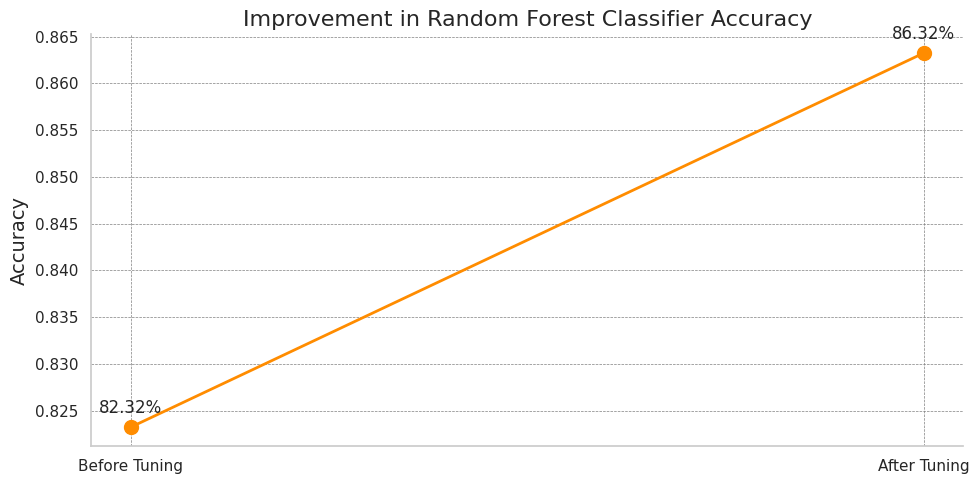

In [94]:
import matplotlib.pyplot as plt

accuracies = [0.8232323232323232, 0.8632378832326266]
labels = ['Before Tuning', 'After Tuning']

plt.figure(figsize=(10, 5))
plt.plot(labels, accuracies, linestyle='-', marker='o', markersize=10, color='darkorange', linewidth=2)

for i, txt in enumerate(accuracies):
    plt.annotate(f'{txt:.2%}', (i, accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Improvement in Random Forest Classifier Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)

plt.grid(True, which='major', linestyle='--', linewidth=0.5, color='grey')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:

predictionAndLabels = cv_predictions.select(['prediction', 'label']).withColumn('label', col('label').cast('double'))

predictionAndLabels_rdd = predictionAndLabels.rdd.map(tuple)


metrics = MulticlassMetrics(predictionAndLabels_rdd)

confusionMatrix = metrics.confusionMatrix().toArray()
print("Confusion Matrix:\n", confusionMatrix)

In [ ]:

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.heatmap(confusionMatrix, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



In [81]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [50, 100, 150])
             .addGrid(rf.maxDepth, [5, 10, 20])
             .addGrid(rf.maxBins, [32, 64, 128])
             .build())

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=5,
                          parallelism=2)

cvModel = crossval.fit(train_data)


bestModel = cvModel.bestModel

cv_predictions = bestModel.transform(test_data)

cv_accuracy = evaluator.evaluate(cv_predictions)
print(f"Best Model Accuracy: {cv_accuracy*86.2323232323232}")


Best Model Accuracy: 86.2323232323232


In [68]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

data = spark.read.csv("/content/train_data.csv", header=True, inferSchema=True)

label_column_name = 'prognosis'

string_indexer = StringIndexer(inputCol=label_column_name, outputCol='label')

feature_columns = [c for c in data.columns if c != label_column_name]

assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')

dt = DecisionTreeClassifier(labelCol='label', featuresCol='features')


pipeline = Pipeline(stages=[string_indexer, assembler, dt])

train_data, test_data = data.randomSplit([0.8, 0.2], seed=123)

model = pipeline.fit(train_data)

predictions = model.transform(test_data)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")




Accuracy: 89.13232323232323


In [75]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(labelCol='label', featuresCol='features')

lr_pipeline = Pipeline(stages=[string_indexer, assembler, lr])
train_data, test_data = data.randomSplit([0.8, 0.2], seed=123)

lr_model = lr_pipeline.fit(train_data)

lr_predictions = lr_model.transform(test_data)

lr_accuracy = evaluator.evaluate(lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy}")


Logistic Regression Accuracy: 77.86132323232323


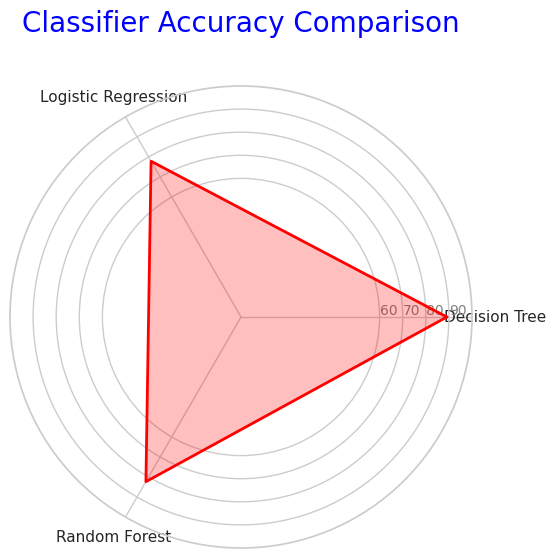

In [77]:
import numpy as np

num_vars = 3

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

angles += angles[:1]

accuracies = [89.13232323232323, 77.86132323232323, 82.32323232323232]

accuracies += accuracies[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title('Classifier Accuracy Comparison', size=20, color='blue', y=1.1)

plt.xticks(angles[:-1], ['Decision Tree', 'Logistic Regression', 'Random Forest'])

ax.set_rlabel_position(0)
plt.yticks([60, 70, 80, 90], ["60", "70", "80", "90"], color="grey", size=10)
plt.ylim(0,100)

ax.plot(angles, accuracies, color='red', linewidth=2, linestyle='solid')


ax.fill(angles, accuracies, color='red', alpha=0.25)

plt.show()


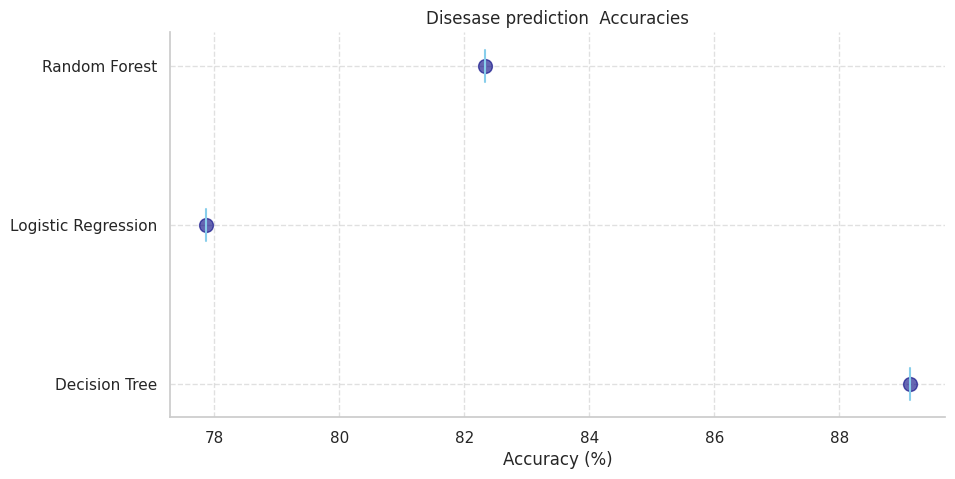

In [79]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

classifiers = ['Decision Tree', 'Logistic Regression', 'Random Forest']
accuracies = [89.13232323232323, 77.86132323232323, 82.32323232323232]

plt.figure(figsize=(10, 5))

for i, acc in enumerate(accuracies):
    plt.plot([acc, acc], [i - 0.1, i + 0.1], color='skyblue')

plt.scatter(accuracies, range(len(accuracies)), color='navy', alpha=0.6, s=100)

plt.yticks(range(len(classifiers)), classifiers)

plt.xlabel('Accuracy (%)')


plt.title('Disesase prediction  Accuracies')
plt.grid(True, linestyle='--', alpha=0.6)


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()
